## Homework 7

### Task 1

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
gazprom_data = pd.read_csv('GAZP_010101_231115.csv')
nornikel_data = pd.read_csv('GMKN_010101_231115.csv')
sber_data = pd.read_csv('SBER_010101_231115.csv')
lukoil_data = pd.read_csv('LKOH_010101_231115.csv')
mos_index = pd.read_csv('IMOEX_010101_231115.csv')

In [113]:
gazprom_data.head(1)

,GAZP,M,20060101,000000,219.0200000,78796025
0,GAZP,M,20060201,0,218.79,152805259


In [95]:
nornikel_data.head(1)

,GMKN,M,20011001,000000,366.0100000,1200
0,GMKN,M,20011101,0,468.95,537828


In [96]:
sber_data.head(1)

,SBER,M,20010101,000000,755.0000000,258932
0,SBER,M,20010201,0,674.0,255593


In [99]:
lukoil_data.head(1)

,LKOH,M,20010101,000000,287.0000000,10809667
0,LKOH,M,20010201,0,274.49,4108812


In [100]:
mos_index.head(1)

,IMOEX,M,20010101,000000,167.7400000,0
0,IMOEX,M,20010201,0,158.1,0


In [125]:
# Даю название столбцам
gazprom_data.columns = ['name', 'del1', 'date', 'del2', 'price', 'del3']
sber_data.columns = ['name', 'del1', 'date', 'del2', 'price', 'del3']
lukoil_data.columns = ['name', 'del1', 'date', 'del2', 'price', 'del3']
nornikel_data.columns = ['name', 'del1', 'date', 'del2', 'price', 'del3']
mos_index.columns = ['name', 'del1', 'date', 'del2', 'price', 'del3']

In [147]:
# Удаляю ненужные столбцы
del mos_index['del3']

In [154]:
# Конвертирую дату в число чтобы удобно отрезать ненужную часть данных
gazprom_data['date'] = pd.to_numeric(gazprom_data['date'])
type(gazprom_data['date'][0])

numpy.int64

In [162]:
gazprom_data = gazprom_data[gazprom_data['date'] >= 20060201]
sber_data= sber_data[sber_data['date'] >= 20060201]
lukoil_data = lukoil_data[lukoil_data['date'] >= 20060201]
nornikel_data = nornikel_data[nornikel_data['date'] >= 20060201]
mos_index = mos_index[mos_index['date'] >= 20060201]

In [180]:
sber_data = sber_data.reset_index()
gazprom_data = gazprom_data.reset_index()
lukoil_data = lukoil_data.reset_index()
nornikel_data = nornikel_data.reset_index()
mos_index = mos_index.reset_index()

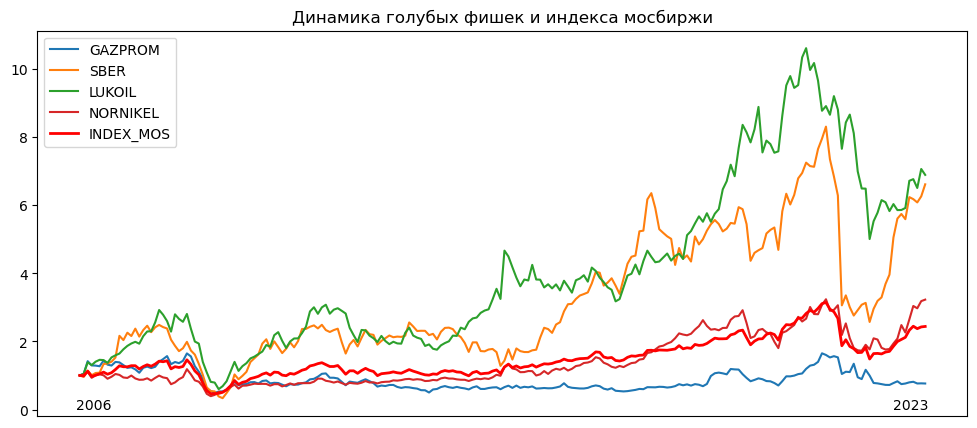

In [448]:
plt.plot(gazprom_data.index, gazprom_data['proconts'])
plt.plot(sber_data.index, sber_data['percents'])
plt.plot(nornikel_data.index, nornikel_data['percents'])
plt.plot(lukoil_data.index, lukoil_data['percents'])
plt.plot(mos_index.index, mos_index['percents'], lw = 2, color = 'red')
plt.legend(['GAZPROM', 'SBER', 'LUKOIL', 'NORNIKEL', 'INDEX_MOS'])
plt.title("Динамика голубых фишек и индекса мосбиржи")
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(True)
#ax.axes.yaxis.set_ticks([])
plt.text(-1, 0, '2006') 
plt.text(205, 0, '2023')
plt.show()

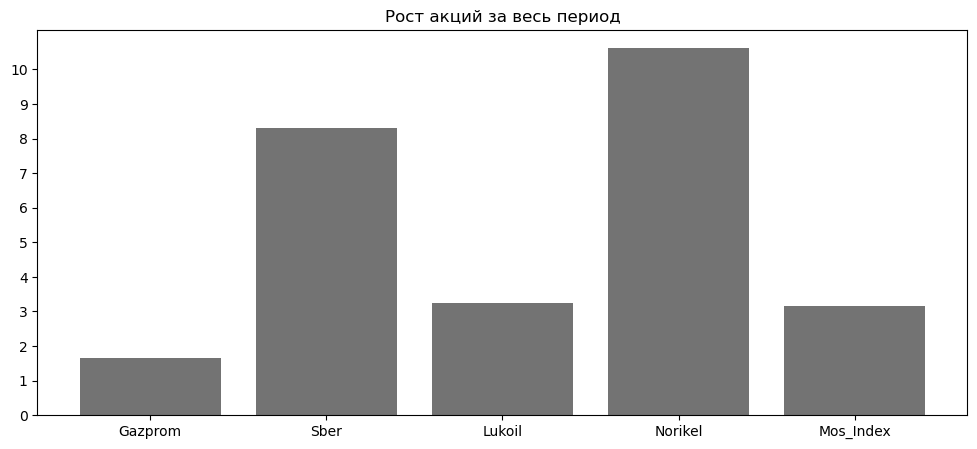

In [475]:
x = ['Gazprom', 'Sber', 'Lukoil', 'Norikel', 'Mos_Index']
y = [gazprom_data.proconts.max(),
     sber_data.percents.max(),
     lukoil_data.percents.max(),
     nornikel_data.percents.max(),
     mos_index.percents.max()]
plt.bar(x, y, color='black', alpha = 0.55)
x_ax = range(0, 11)
ax = plt.gca()
ax.axes.yaxis.set_ticks(x_ax)
plt.title('Рост акций за весь период')
plt.show()